## Data Preprocessing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/fifa_players.csv')
df.head()

,wage_eur,age,height_cm,weight_kg,nationality_name,overall,potential,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,movement_agility,movement_reactions,movement_balance,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,320000.0,34.0,170.0,72.0,b'Argentina',93.0,93.0,85.0,95.0,70.0,...,91.0,94.0,95.0,35.0,24.0,6.0,11.0,15.0,14.0,8.0
1,270000.0,32.0,185.0,81.0,b'Poland',92.0,92.0,71.0,95.0,90.0,...,77.0,93.0,82.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0
2,270000.0,36.0,187.0,83.0,b'Portugal',91.0,91.0,87.0,95.0,90.0,...,86.0,94.0,74.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0
3,270000.0,29.0,175.0,68.0,b'Brazil',91.0,91.0,85.0,83.0,63.0,...,96.0,89.0,84.0,32.0,29.0,9.0,9.0,15.0,15.0,11.0
4,350000.0,30.0,181.0,70.0,b'Belgium',91.0,91.0,94.0,82.0,55.0,...,79.0,91.0,78.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0


**Checking For Duplicates**

In [14]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

**Handle Missing Values**

In [15]:
# Check features with nan value
df.isnull().sum()

wage_eur                      0
age                           0
height_cm                     0
weight_kg                     0
nationality_name              0
overall                       0
potential                     0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_curve                   0
skill_fk_accuracy             0
skill_long_passing            0
skill_ball_control            0
movement_acceleration         0
movement_sprint_speed         0
movement_agility              0
movement_reactions            0
movement_balance              0
defending_standing_tackle     0
defending_sliding_tackle      0
goalkeeping_diving            0
goalkeeping_handling          0
goalkeeping_kicking           0
goalkeeping_positioning       0
goalkeeping_reflexes          0
dtype: int64

## **Feature Engineering**

In [16]:
# define numerical, categorical & temporal features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O' and "date" not in feature]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
temporal_features = [feature for feature in df.columns if df[feature].dtype !='O' and "date" in feature]

print(f"we have {len(numerical_features)} numerical features and they are : {numerical_features}")
print(f"we have {len(categorical_features)} categorical features and they are : {categorical_features}")
print(f"we have {len(temporal_features)} temporal features and they are : {temporal_features}")

we have 28 numerical features and they are : ['wage_eur', 'age', 'height_cm', 'weight_kg', 'overall', 'potential', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
we have 1 categorical features and they are : ['nationality_name']
we have 0 temporal features and they are : []


**Handling Numerical Features**

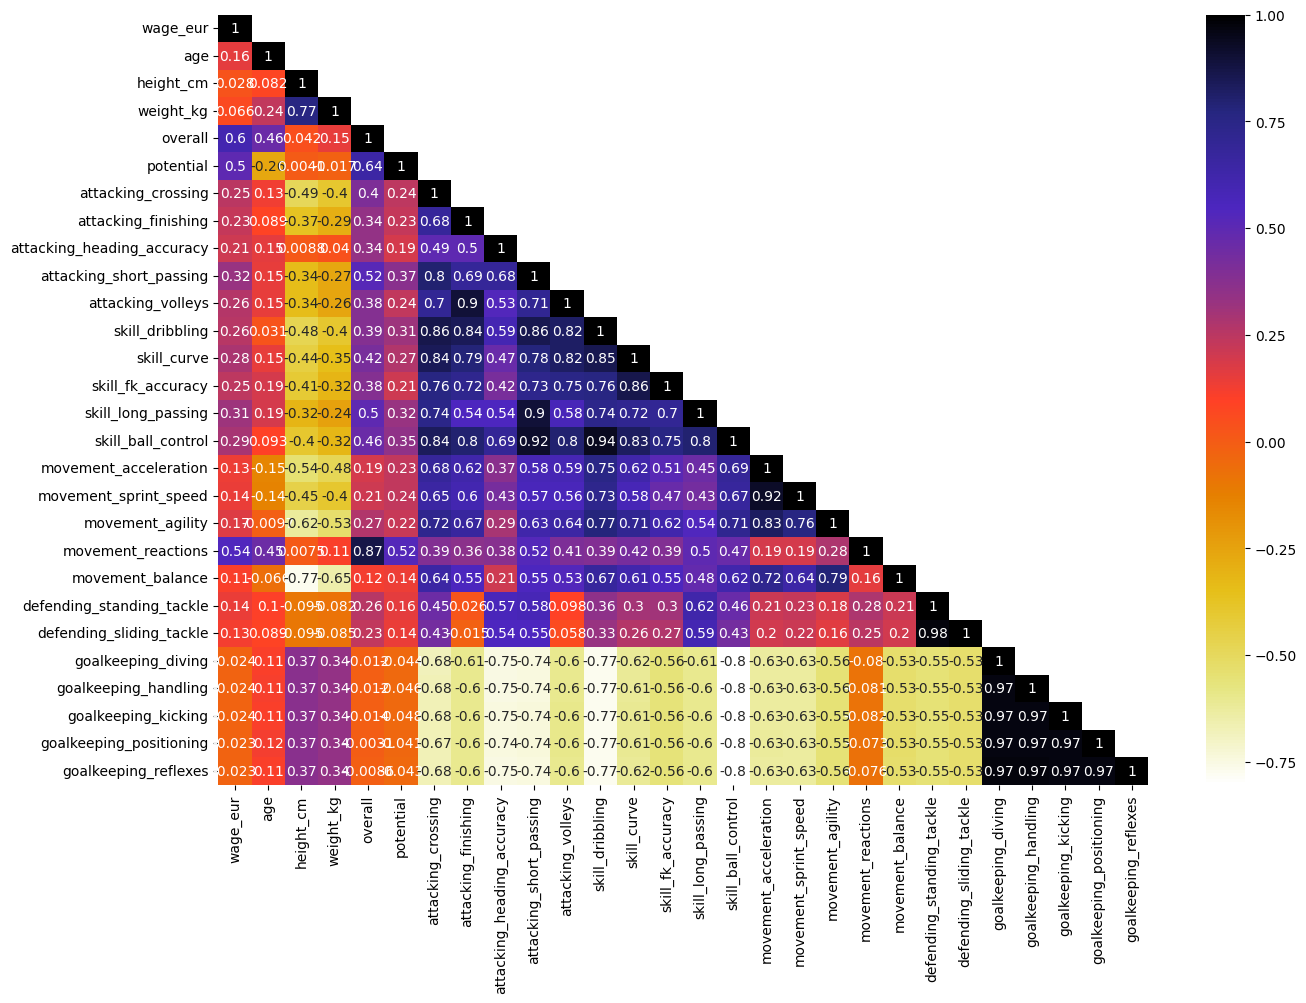

In [17]:
plt.figure(figsize = (15,10))
sns.heatmap(df[numerical_features].corr(), cmap="CMRmap_r", annot=True, mask= np.triu(df[numerical_features].corr(), k=1))
plt.show()

**Variance Inflation Factor Check**

In [18]:
import statsmodels.api as sm

for feature in numerical_features:
    x = df[feature]
    y = df['wage_eur']
    model = sm.OLS(x, y)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1/ (1-rsq), 2)
    print(f"VIF of {feature} is {vif}")

VIF of wage_eur is inf
VIF of age is 1.24
VIF of height_cm is 1.22
VIF of weight_kg is 1.22
VIF of overall is 1.29
VIF of potential is 1.26
VIF of attacking_crossing is 1.29
VIF of attacking_finishing is 1.28
VIF of attacking_heading_accuracy is 1.27
VIF of attacking_short_passing is 1.3
VIF of attacking_volleys is 1.3
VIF of skill_dribbling is 1.29
VIF of skill_curve is 1.31
VIF of skill_fk_accuracy is 1.29
VIF of skill_long_passing is 1.3
VIF of skill_ball_control is 1.29
VIF of movement_acceleration is 1.24
VIF of movement_sprint_speed is 1.24
VIF of movement_agility is 1.25
VIF of movement_reactions is 1.31
VIF of movement_balance is 1.23
VIF of defending_standing_tackle is 1.24
VIF of defending_sliding_tackle is 1.23
VIF of goalkeeping_diving is 1.08
VIF of goalkeeping_handling is 1.08
VIF of goalkeeping_kicking is 1.08
VIF of goalkeeping_positioning is 1.08
VIF of goalkeeping_reflexes is 1.08


**Report:**
 - All numerical feature have low VIF score

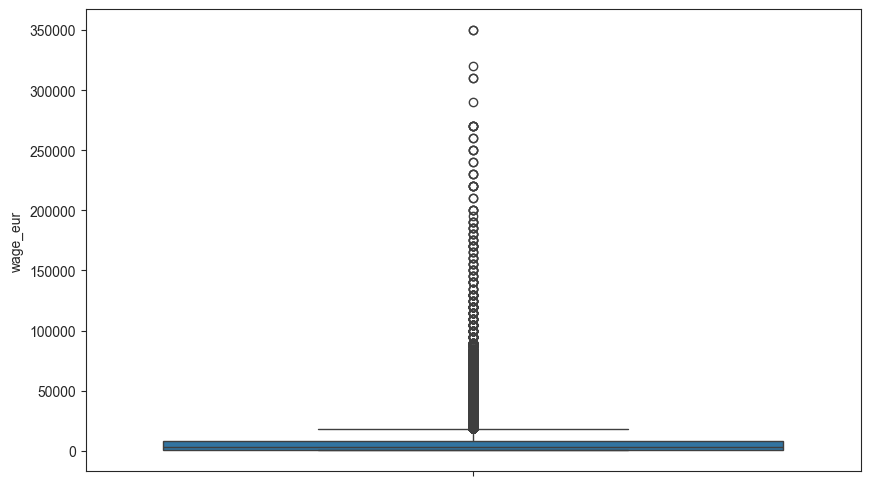

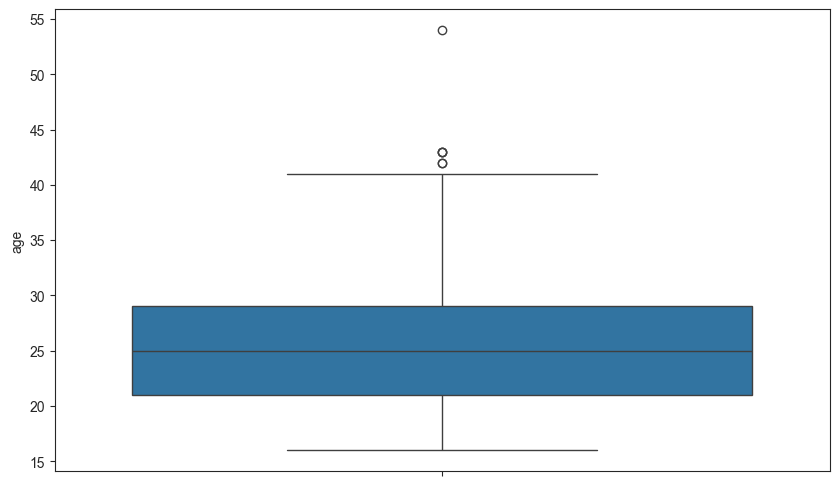

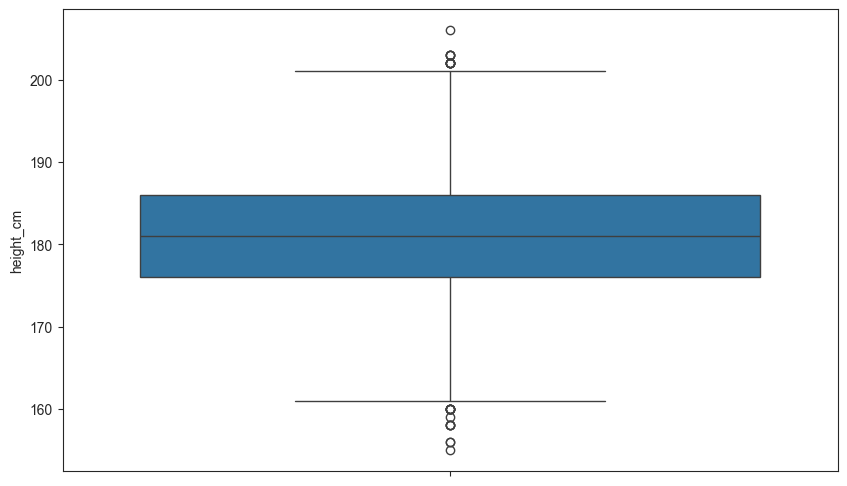

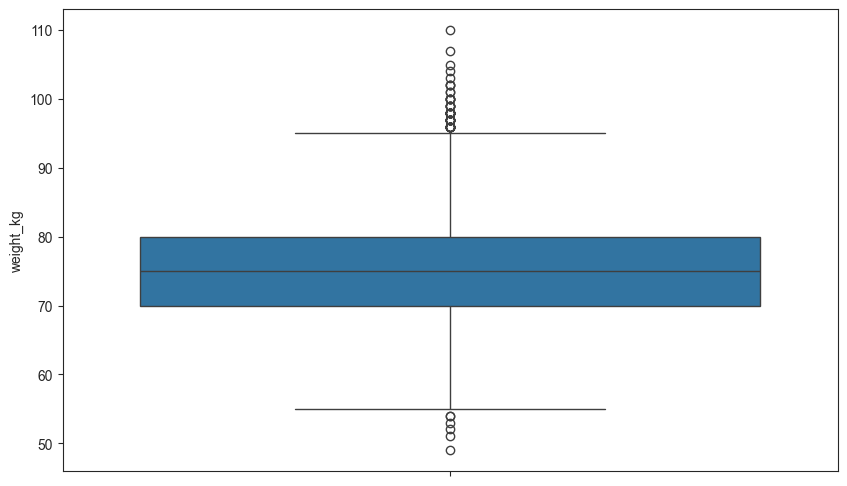

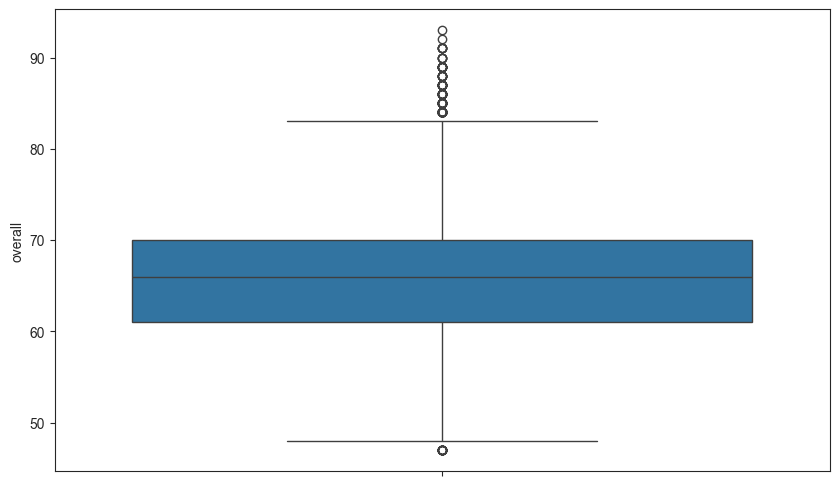

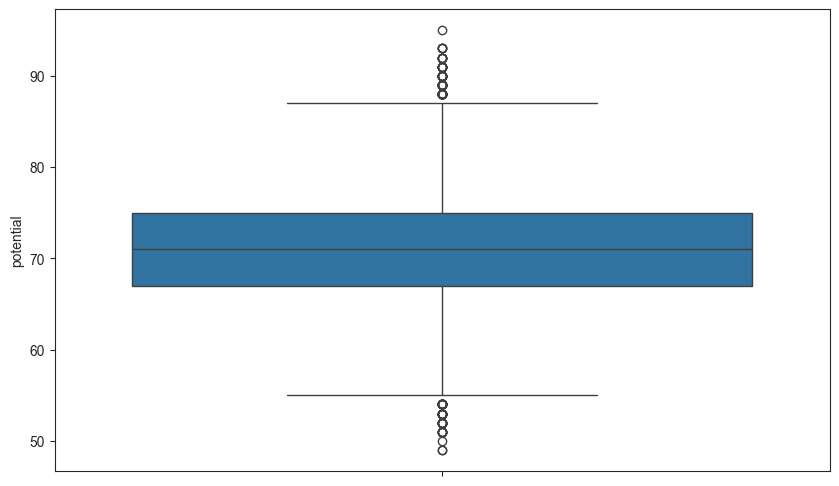

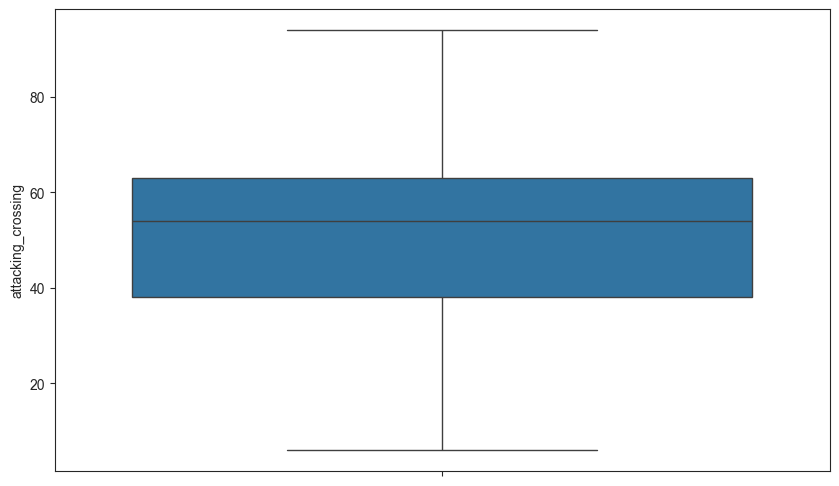

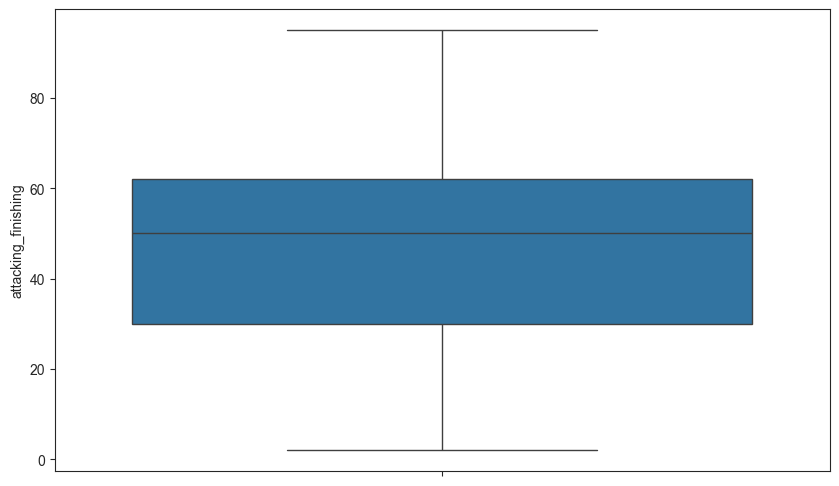

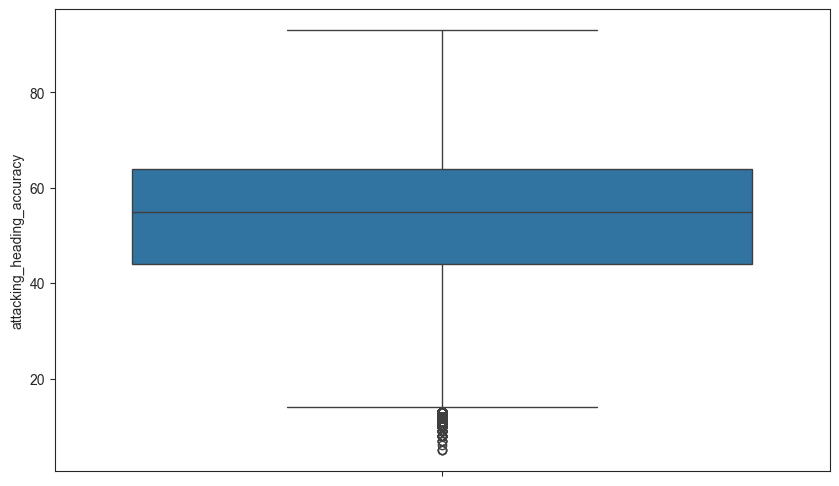

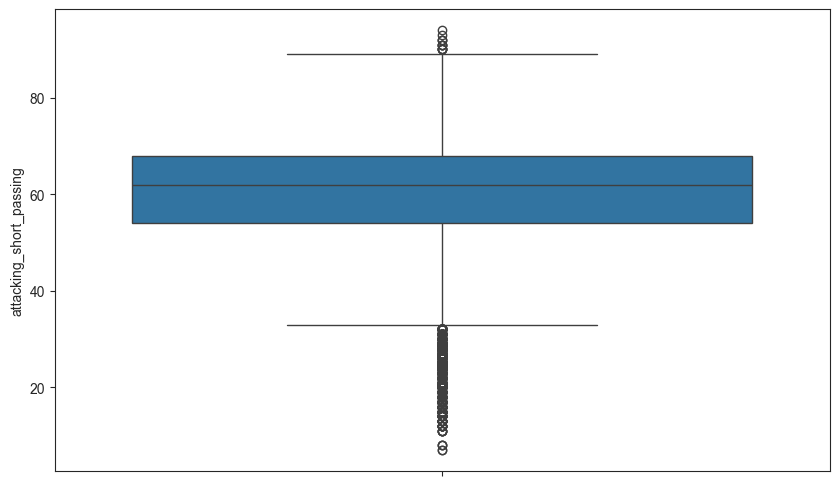

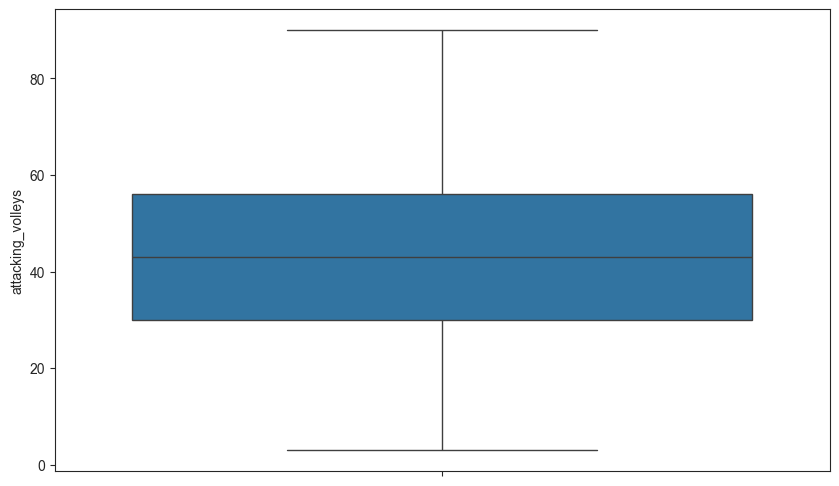

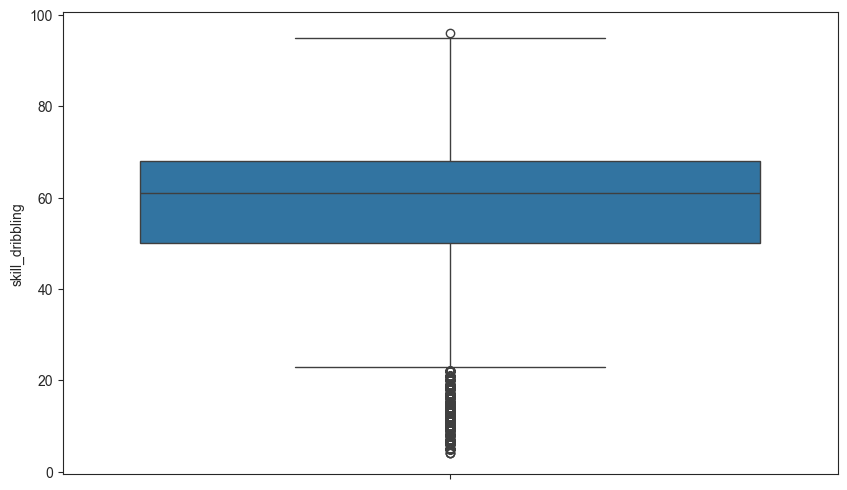

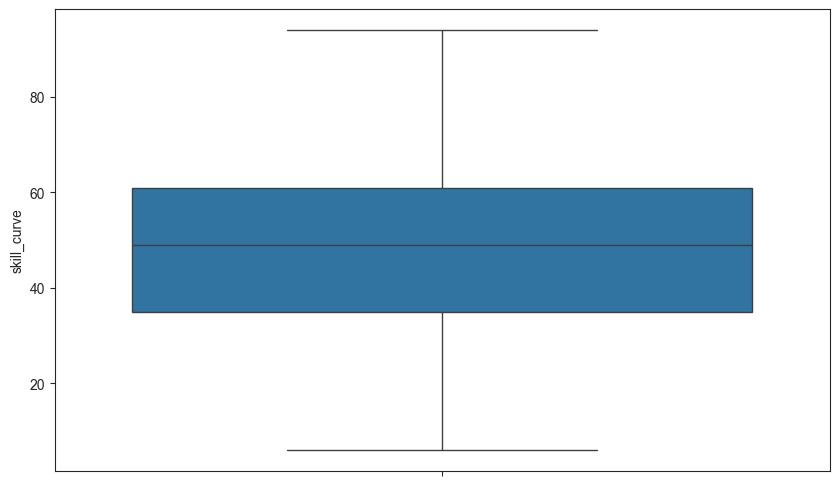

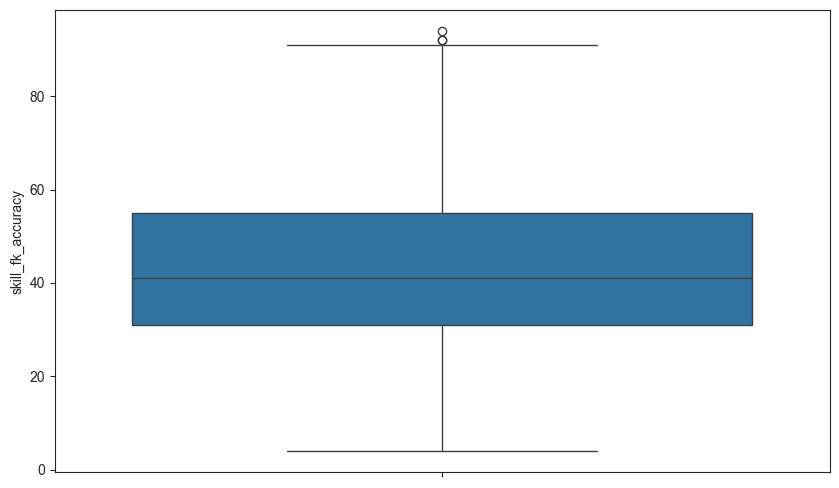

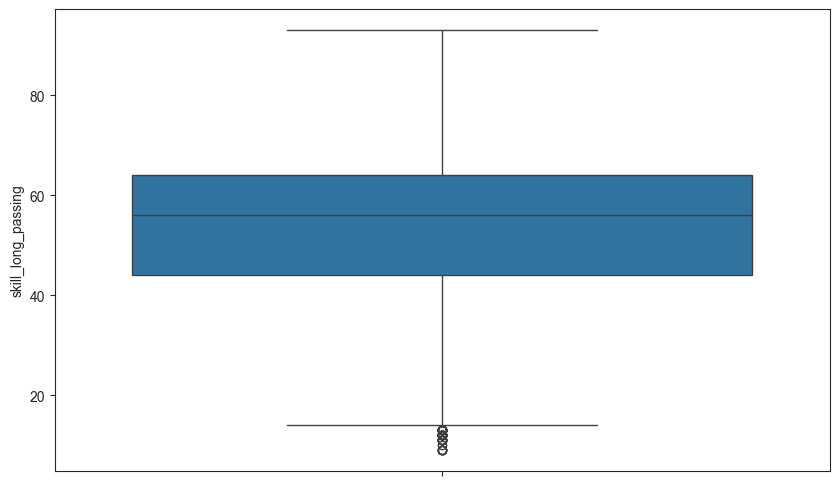

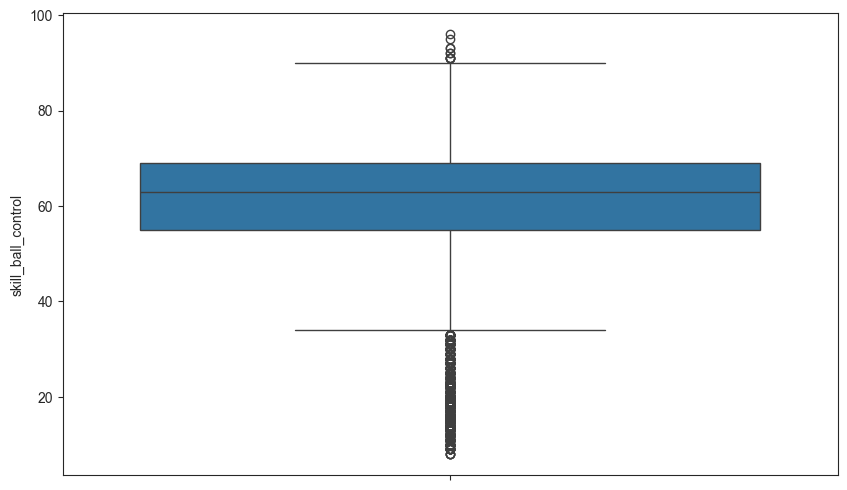

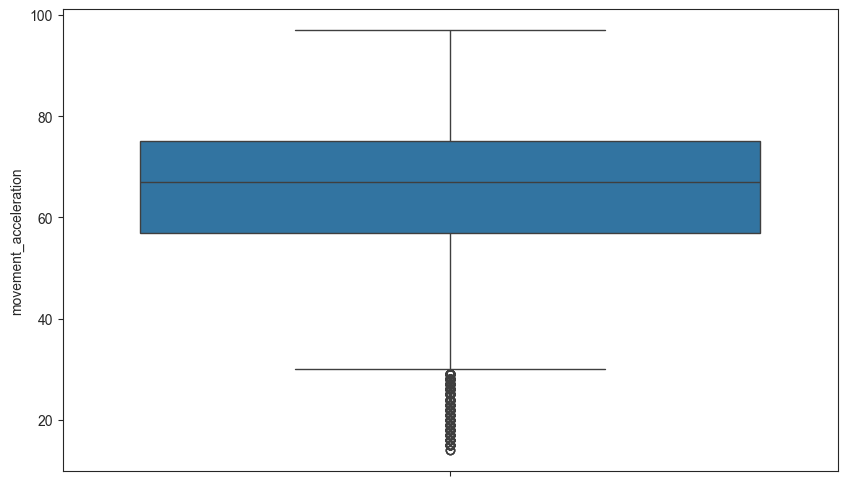

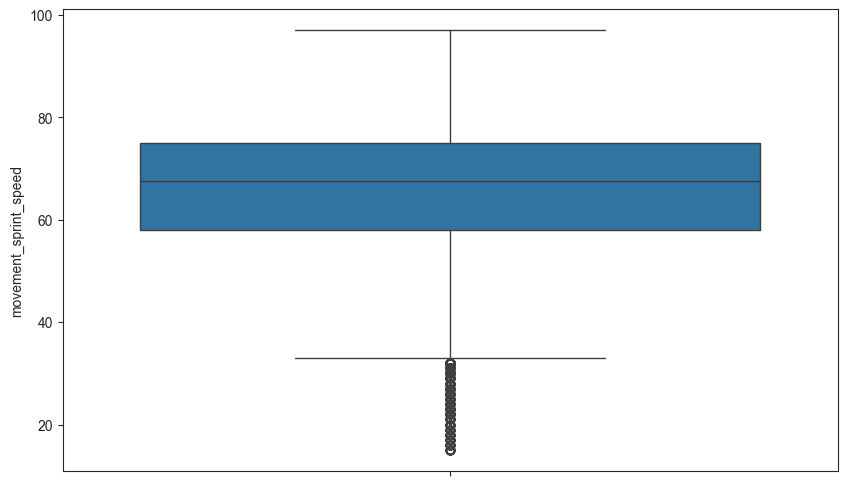

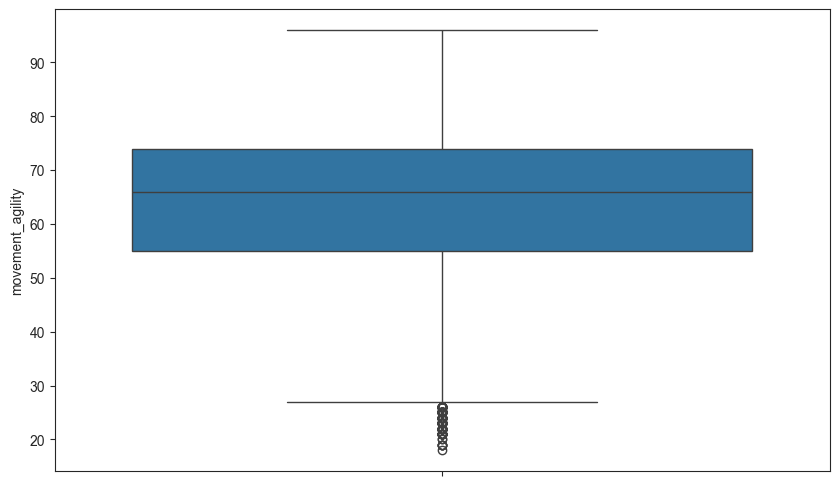

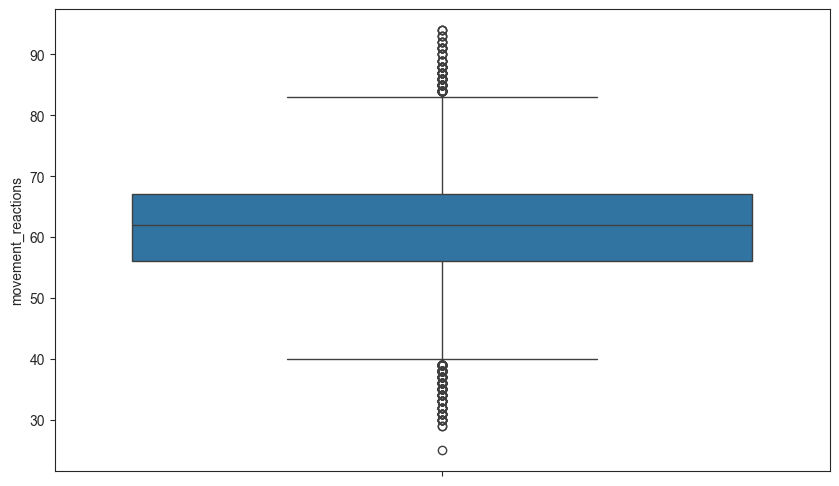

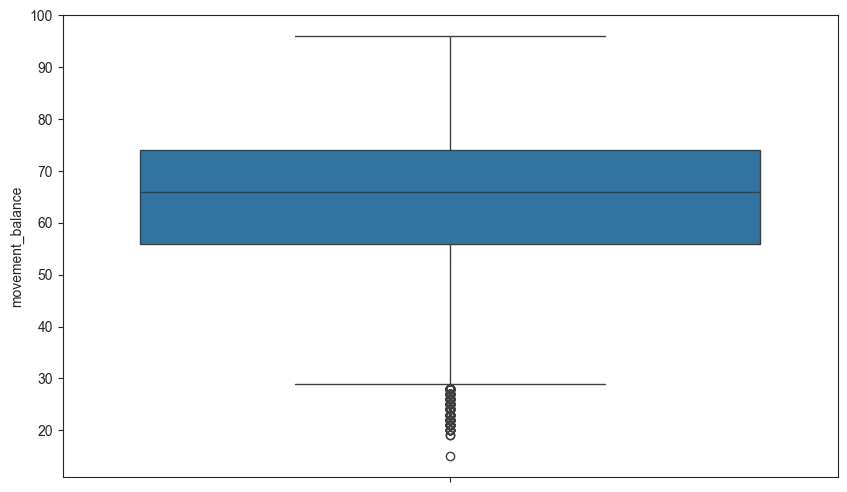

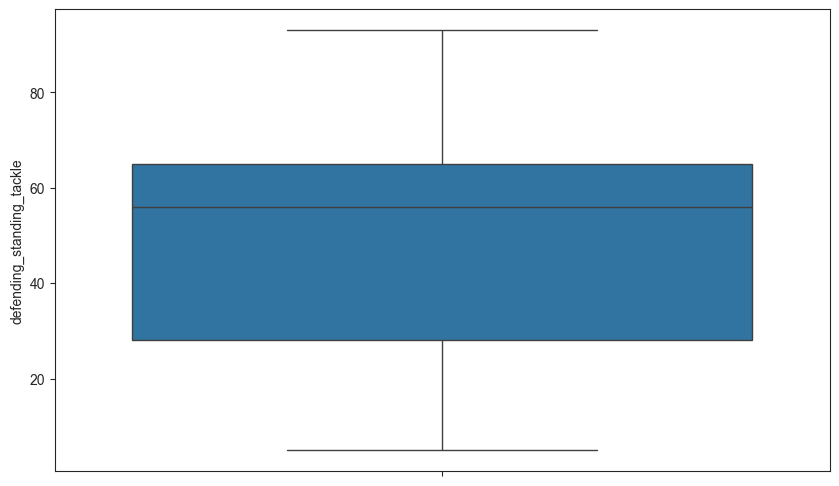

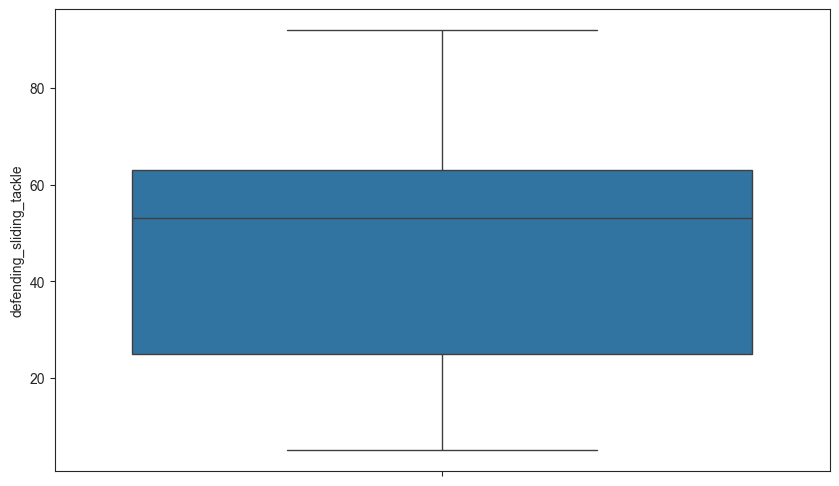

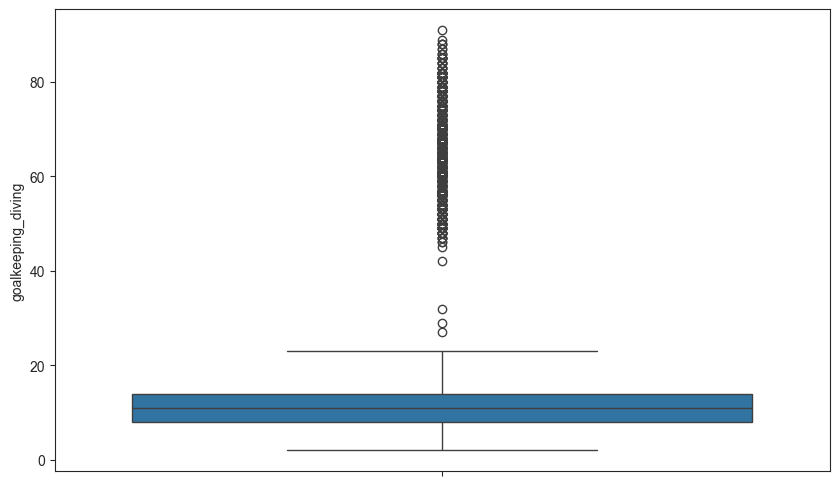

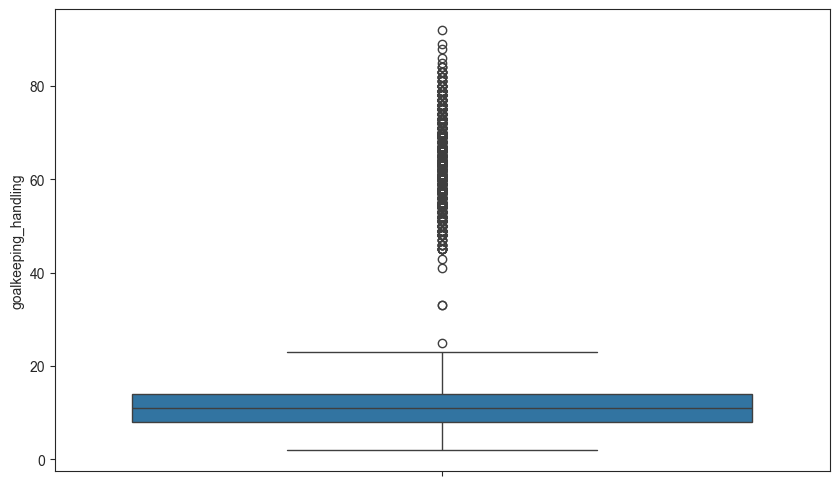

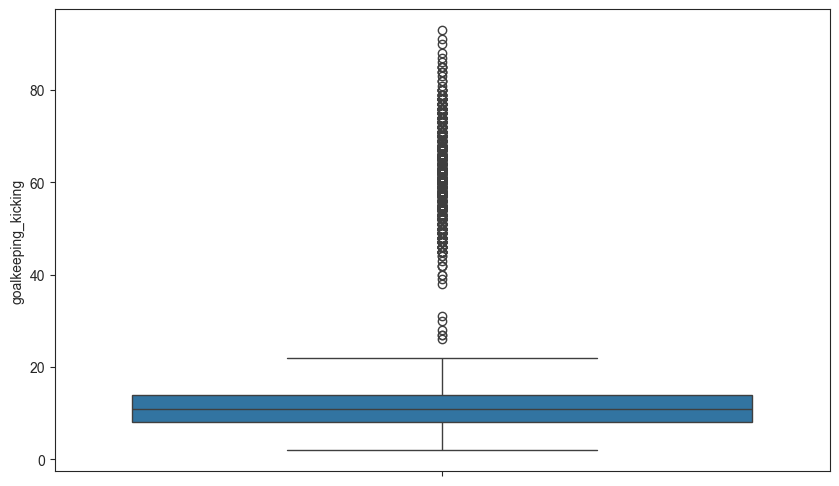

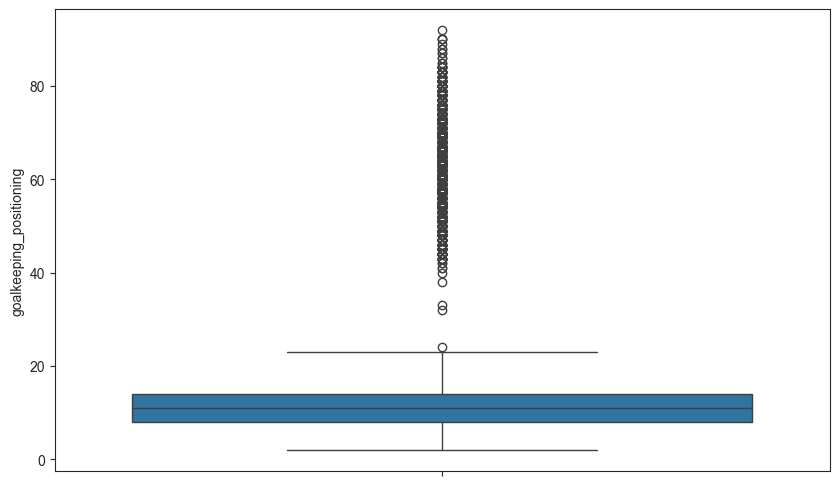

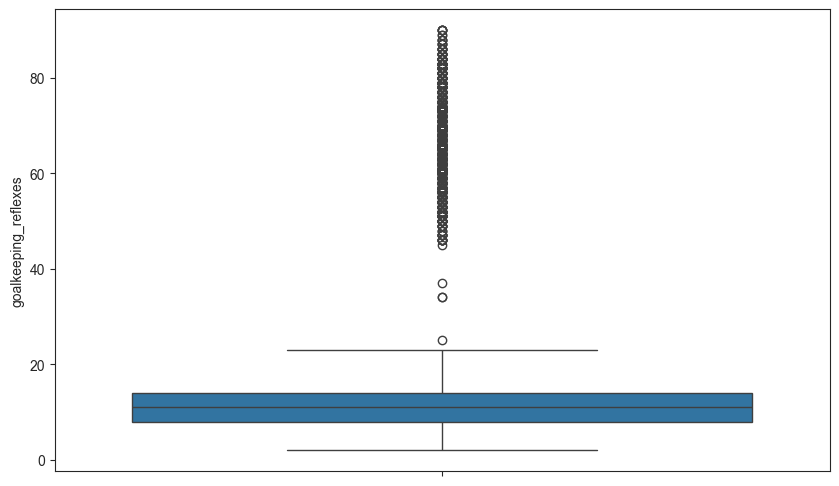

In [19]:
# for all Numerical Features
for i in numerical_features:
        plt.figure(figsize=(10,6))
        sns.set_style('ticks')
        ax = sns.boxplot(df[i])

**Report:**
 - `wage_eur` our target variable have few outliers but, these outliers are expected as some footballers do have high wages
 - Very few numerical feature have outliers in them and particularly all the goalkeeping features
 - It is expected to see outliers in goalkeeping features as they are entirely different from other positions

**Distribution Check**

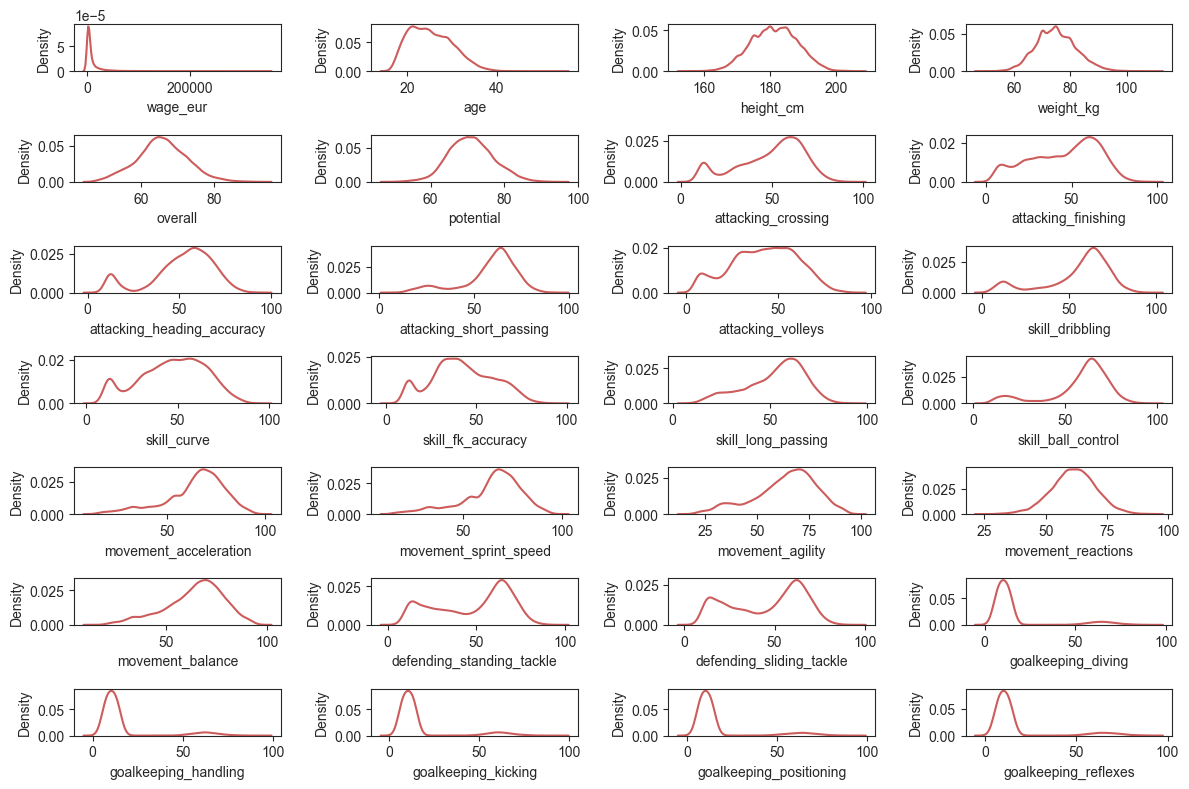

In [20]:
# distribution of data before scaling
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(7, 4, i+1)
    sns.kdeplot(x=df[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

**Handling Categorical Features**

**Handling nationality_name**

In [21]:
df["nationality_name"].head()

0    b'Argentina'
1       b'Poland'
2     b'Portugal'
3       b'Brazil'
4      b'Belgium'
Name: nationality_name, dtype: object

In [22]:
def split_country(x):
    if x.startswith('b'):
        x = x[1:]
    if x.startswith("'") and x.endswith("'"):
        x = x[1:-1]
    return x

df["nationality_name"] = df["nationality_name"].apply(split_country)

**ANOVA Check (Categorical Feature Importance)**

In [23]:
from scipy.stats import f_oneway

for feature in categorical_features:
    categories = df[feature].unique()
    grouped_data = [df[df[feature] == category]["wage_eur"] for category in categories]

    # F-statistic and p-value
    f_stat, p_value = f_oneway(*grouped_data)

    # Results
    print(f"\n #### {feature} ####")
    print("F-Statistic:", f_stat)
    print("P-Value:", p_value)


 #### nationality_name ####
F-Statistic: 7.000940674541429
P-Value: 2.6560072732829284e-140


**Report:**
 - According to p-value, `nationality_name` is important and can be encoded

### **Splitting X and Y**

In [24]:
X = df.drop(['wage_eur'], axis=1)
y = df['wage_eur']
feature_names = X.columns

### **Feature Encoding and Scaling**

In [25]:
from sklearn.preprocessing import RobustScaler
from category_encoders.binary import BinaryEncoder
from sklearn.compose import ColumnTransformer
num_features = X.select_dtypes(exclude="object").columns
binary_cols = ['nationality_name']

numeric_transformer = RobustScaler()
categorical_transformer = BinaryEncoder()

preprocessor = ColumnTransformer(
    [("BinaryEncoder", categorical_transformer, binary_cols),
     ("RobustScaler", numeric_transformer, num_features)
    ])
X = preprocessor.fit_transform(X)

# Reconstruct feature names
ohe_feature_names = preprocessor.named_transformers_["BinaryEncoder"].get_feature_names_out(binary_cols)
transformed_feature_names = list(ohe_feature_names) + list(num_features)

# Convert the transformed data back to a DataFrame
X_transformed_df = pd.DataFrame(X, columns=transformed_feature_names)

In [26]:
print(X_transformed_df.columns)

Index(['nationality_name_0', 'nationality_name_1', 'nationality_name_2',
       'nationality_name_3', 'nationality_name_4', 'nationality_name_5',
       'nationality_name_6', 'nationality_name_7', 'age', 'height_cm',
       'weight_kg', 'overall', 'potential', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes'],
      dtype='object')


**Train Test Spliting**

In [27]:
from sklearn.model_selection import train_test_split
# separate into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((15342, 35), (3836, 35))

## **Model Selection**

- Trying out Various Regression models with default values are tried and
- Choosing top 3 models with Highest Accuracy score and proceed with HyperParameter Tuning

In [28]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

### **Function to Evaluate Models**

In [29]:
def evaluate_model(true, predicted):
    r2 = r2_score(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    mae = mean_absolute_error(true, predicted)
    return mae, rmse, r2

### **Model Training and Evaluation**

In [30]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest ": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVM": SVR()
}

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n') 

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 15027.9687
- Mean Absolute Error: 8196.6979
- R2 Score: 0.4033
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 15265.1269
- Mean Absolute Error: 8309.1360
- R2 Score: 0.3890


Lasso
Model performance for Training set
- Root Mean Squared Error: 15027.9841
- Mean Absolute Error: 8194.8012
- R2 Score: 0.4033
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 15263.8989
- Mean Absolute Error: 8306.2264
- R2 Score: 0.3891


Ridge
Model performance for Training set
- Root Mean Squared Error: 15027.9711
- Mean Absolute Error: 8196.0645
- R2 Score: 0.4033
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 15264.8351
- Mean Absolute Error: 8308.2597
- R2 Score: 0.3890


K-Neighbors
Model performance for Training set
- Root Mean Squared Error: 9198.4774
- Mean Absolute Error: 3782.8060
- R2

### **Comparing Model Results**

In [31]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model Name", "R2 Score"]).sort_values(by=["R2 Score"], ascending=False)

,Model Name,R2 Score
8,Gradient Boosting,0.777861
5,Random Forest,0.766454
6,XGBRegressor,0.760500
3,K-Neighbors,0.672466
4,Decision Tree,0.561557
1,Lasso,0.389119
2,Ridge,0.389044
0,Linear Regression,0.389021
9,SVM,-0.069829
7,AdaBoost,-0.121353


**Hyper parameter tuning for top 2 models**

In [32]:
#Initialize few parameter for Hyperparamter tuning
gb_params = {"learning_rate": [0.3, 0.03],
            "max_depth": [3, 6, 8, 10, 15],
            "n_estimators": [100, 200, 500, 1000],
             "subsample": [0.5, 0.7, 0.8, 1]
             }

rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [33]:
# Models list for Hyperparameter tuning
randomcv_models = [('GB', GradientBoostingRegressor(), gb_params),
                   ("RF", RandomForestRegressor(), rf_params)                   
                   ]

In [34]:
model_param = {}
for name, model, params in randomcv_models:
    try:
        random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
        random.fit(X_train, y_train)
        model_param[name] = random.best_params_
    except AttributeError as e:
        print(f"Error with model {name}: {e}")
        continue

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for GB -------------------
{'subsample': 0.5, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.03}
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [35]:
models = {
    "Random Forest Regressor": RandomForestRegressor(**model_param['RF'], n_jobs=-1),
    "Gradient Boosting Regressor": GradientBoostingRegressor(**model_param['GB']),
    #"KNN": KNeighborsRegressor(**model_param['KNN'])
    }

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 3439.9420
- Mean Absolute Error: 1544.2609
- R2 Score: 0.9687
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9332.6095
- Mean Absolute Error: 4197.0555
- R2 Score: 0.7716


Gradient Boosting Regressor
Model performance for Training set
- Root Mean Squared Error: 3222.7477
- Mean Absolute Error: 2021.3221
- R2 Score: 0.9726
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9541.7733
- Mean Absolute Error: 4129.8710
- R2 Score: 0.7613




In [36]:
pd.DataFrame(list(zip(model_list, r2_list*100)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Random Forest Regressor,0.771634
1,Gradient Boosting Regressor,0.761283


In [37]:
best_model = RandomForestRegressor(**model_param['RF'], n_jobs=-1)
best_model.fit(X_train, y_train)
# Final predictions
final_predictions = best_model.predict(X_test)

mae = mean_absolute_error(y_test, final_predictions)
mse = mean_squared_error(y_test, final_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, final_predictions)

# print final metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 4190.76
Mean Squared Error (MSE): 88344217.32
Root Mean Squared Error (RMSE): 9399.16
R-squared (R2): 0.77


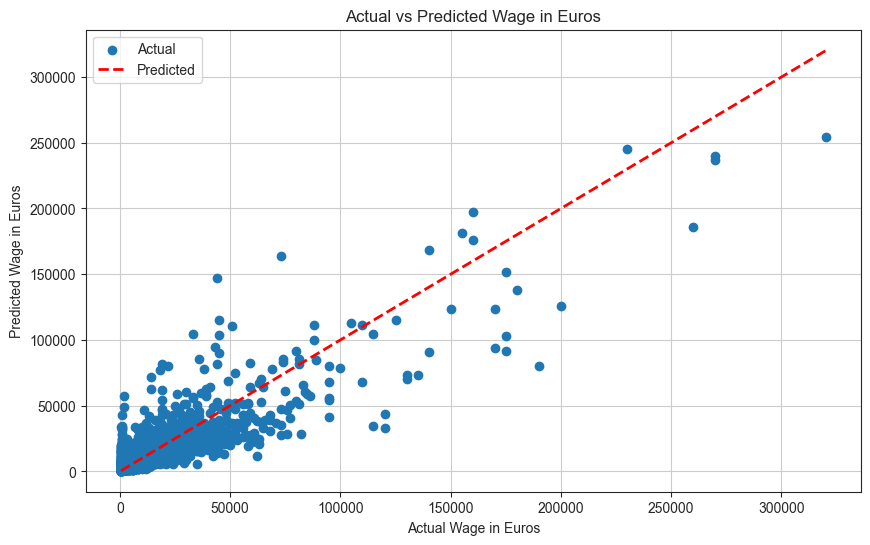

In [38]:
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, final_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Wage in Euros')
plt.ylabel('Predicted Wage in Euros')
plt.title('Actual vs Predicted Wage in Euros')
plt.legend(['Actual', 'Predicted'])
plt.grid(True)
plt.show()

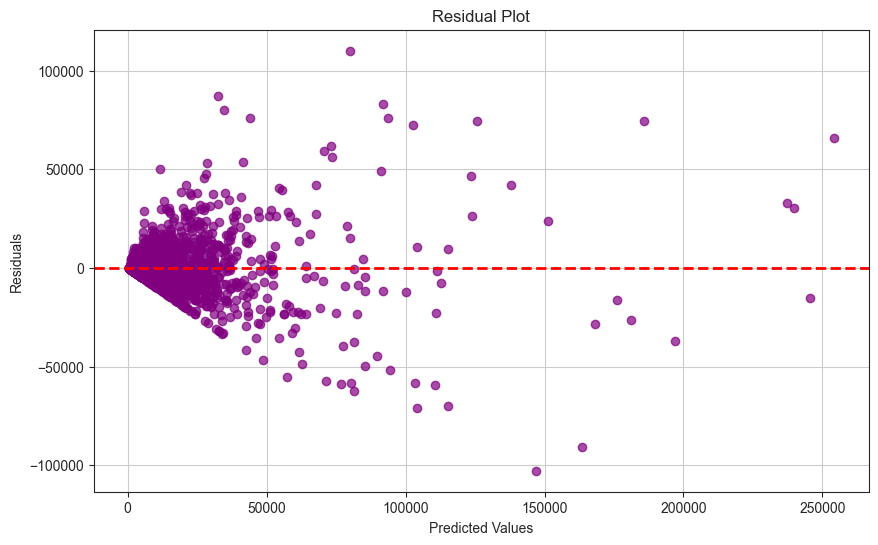

In [39]:
# Calculate residuals
residuals = y_test - final_predictions

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(final_predictions, residuals, alpha=0.7, color='purple')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

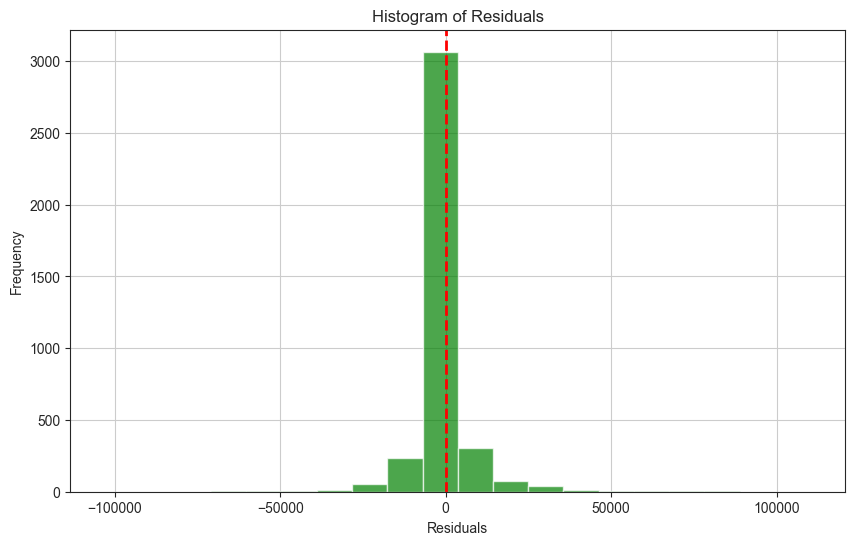

In [40]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='green', alpha=0.7)
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show()

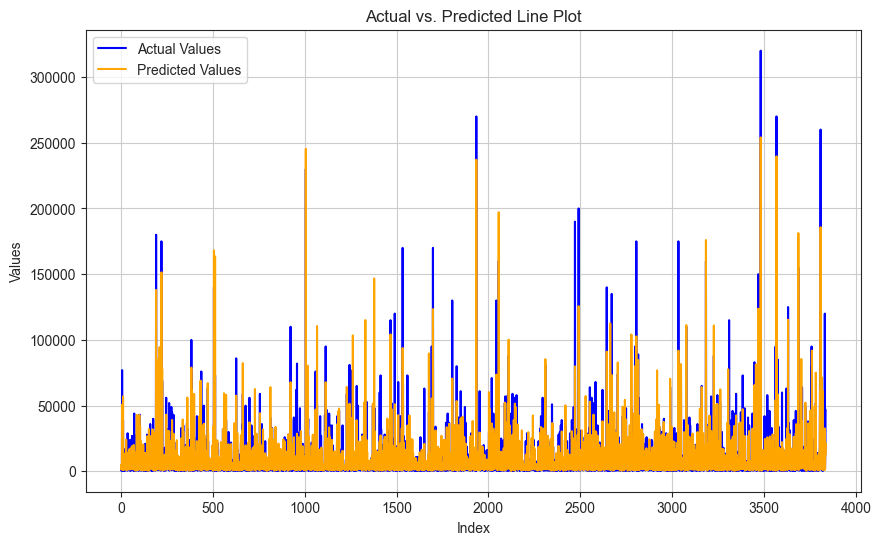

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Values', color='blue')
plt.plot(range(len(final_predictions)), final_predictions, label='Predicted Values', color='orange')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Line Plot')
plt.legend()
plt.grid(True)
plt.show()

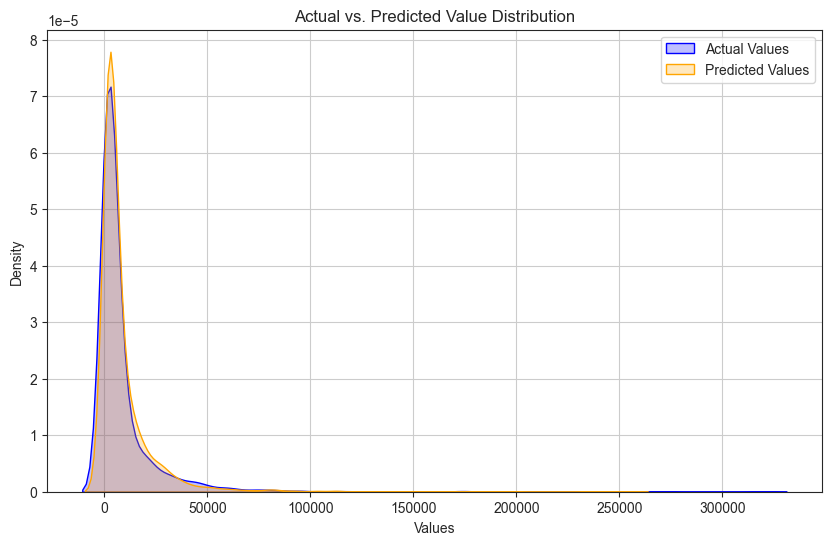

In [42]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual Values', color='blue', shade=True)
sns.kdeplot(final_predictions, label='Predicted Values', color='orange', shade=True)
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Actual vs. Predicted Value Distribution')
plt.legend()
plt.grid(True)
plt.show()

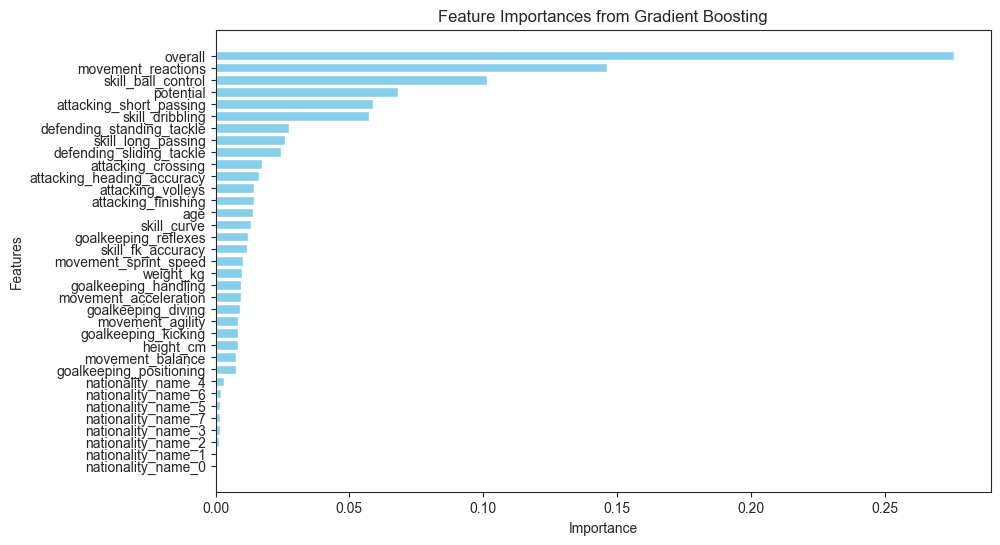

In [43]:
# Assuming your model is `gb_model` and `X_train` is your training data
feature_importances = best_model.feature_importances_
features = X_transformed_df.columns  # Replace with your feature names

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Gradient Boosting')
plt.gca().invert_yaxis()
plt.show()